In [11]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [12]:
iris = load_iris()

In [54]:
features = iris.data.T

input_data = iris.data
output_target = iris.target
print(output_target)
new_output = []
for i in range(len(output_target)):
    if output_target[i] == 0:
        new_output.append(([1,0,0]))
    elif output_target[i] == 1:
        new_output.append(([0,1,0]))
    elif output_target[i] == 2:
        new_output.append(([0,0,1]))
print(new_output)
output_target = np.array(new_output)

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

sepal_length_label =  iris.feature_names[0]
sepal_width_label =  iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], 

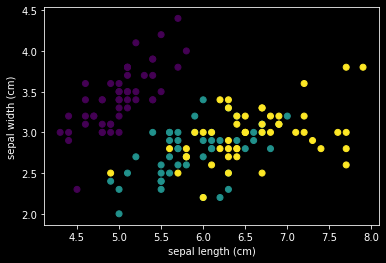

In [55]:
plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.show()

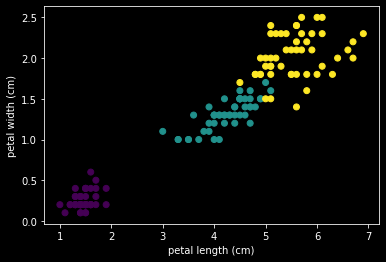

In [56]:
plt.scatter(petal_length, petal_width, c=iris.target)
plt.xlabel(petal_length_label)
plt.ylabel(petal_width_label)
plt.show()

In [57]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    return sigm(z)*(1.0 - sigm(z))

In [74]:
class Problem4:
    def __init__(self, nr_input_neurons, nr_hidden_neruons, nr_output_neruons):
        self.nr_input_neurons = nr_input_neurons
        self.nr_output_neruons =nr_output_neruons

        self.train_inputs = input_data
        self.train_target_output = output_target

        np.random.seed(13)

        # hidden layer of n neurons and i inputs
        self.w2 = np.random.randn(nr_hidden_neruons,nr_input_neurons)
        self.b2 = np.random.randn(nr_hidden_neruons,1)

        # output layer of n neuron and i inputs
        self.w3 = np.random.randn(nr_output_neruons,nr_hidden_neruons)
        self.b3 = np.random.randn(nr_output_neruons,1)

    def feedforward(self, inputs):
        # here we muplitply the weight by the input and add the bias to it
        neurons_layer2 = sigm(self.w2.dot(inputs) + self.b2)
        neurons_layer3 = sigm(self.w3.dot(neurons_layer2) + self.b3)
        
        return neurons_layer3 # we return the output
    
    def predict(self, input):
        lay3 = self.feedforward(input)
        ans = []
        # print("\n prediction: ", lay3, "Shape: ", lay3.shape)
        for i in range(self.nr_output_neruons):
            if lay3[i] >= 0.5:
                ans.append([1])
            else: ans.append([0])
        return ans

    def backprop(self, inputs, target_output):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)

        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0

        # zip allows you to iterate two lists at the same time
        # letters = ['a', 'b', 'c'] & numbers = [1, 2, 3]
        # a -> 1, b -> 2, c -> 3
        for x, y in zip(inputs, target_output):
            a1 = x.reshape(self.nr_input_neurons,1)     
            # feedforward propagation
            z2 = self.w2.dot(a1) + self.b2      
            a2 = sigm(z2)                        

            z3 = self.w3.dot(a2) + self.b3       
            a3 = sigm(z3)    

            y = y.reshape(self.nr_output_neruons,1)  # convert the output vector y into a n_output_neuron ,1 column since it has n_output neurons                   

            # cross-entropy cost function
            # (basic backpropagation formula, opposite of feedforward)
            delta3 = (a3-y) * sigm_deriv(z3)                
            delta2= sigm_deriv(z2) * self.w3.T.dot(delta3)    

            del_w3 += delta3.dot(a2.T)            
            del_b3 += delta3
               
            del_w2 += delta2.dot(a1.T)      
            del_b2 += delta2

            # cost += ((a3-y)**2).sum()
            # mean error cost function improves the learning speed
            cost -=  np.sum(y*np.log(a3) + (1-y)*np.log(1-a3))
        n = len(target_output)  # number of training vectors           
        # get the average change per training input
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n 

    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_target_output
        cost = np.zeros((epochs,))
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3

        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.plot(cost)
        return cost   


Training...

setosa=1-0-0, versicolor=0-1-0, virginica=0-0-1
5.1, 3.5, 1.4, 0.2 = Iris Setosa:  [[1], [0], [0]]
7, 3.3, 4.7, 1.4 = Iris versicolor:  [[0], [1], [0]]
6.3, 3.3, 6, 2.5 = Iris Virginica:  [[0], [0], [1]]


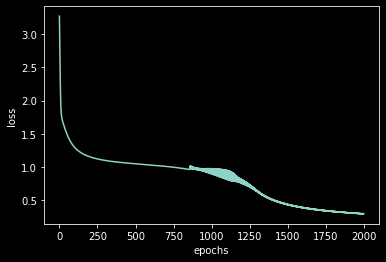

In [77]:
# Train for problem3
problem4 = Problem4(4,5,3)
xs = problem4.train_inputs.T

print("Training...\n")

epochs = 2000
trainSet = problem4.train(epochs, 1.0)

print("setosa=1-0-0, versicolor=0-1-0, virginica=0-0-1")
print("5.1, 3.5, 1.4, 0.2 = Iris Setosa: ",problem4.predict(np.array([[5.1],[3.5],[1.4],[0.2]])))
print("7, 3.3, 4.7, 1.4 = Iris versicolor: ",problem4.predict(np.array([[7],[3.3],[4.7],[1.4]])))
print("6.3, 3.3, 6, 2.5 = Iris Virginica: ",problem4.predict(np.array([[6.3],[3.3],[6],[2.5]])))
